In [1]:
import matplotlib.pyplot as plt

import numpy as np #importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd #importa a biblioteca usada para trabalhar com dataframes
import util

#importa o arquivo e extrai as features
Xfeatures, Y = util.extract_features('datasets/everything.csv')

In [2]:
import svmutil
from svmutil import svm_read_problem
from svmutil import svm_problem
from svmutil import svm_parameter
from svmutil import svm_train
from svmutil import svm_predict
from svmutil import svm_save_model


In [3]:
### Classificador - Kernel linear ###

# semente usada na randomizacao dos dados.
randomSeed = 10 

# gera os indices aleatorios que irao definir a ordem dos dados
idx_perm = np.random.RandomState(randomSeed).permutation(range(len(Y)))

# ordena os dados de acordo com os indices gerados aleatoriamente
Xk, Yk = Xfeatures[idx_perm, :], Y[idx_perm]

# define a porcentagem de dados que irao compor o conjunto de treinamento
pTrain = 0.8 

# obtem os indices dos dados da particao de treinamento e da particao de teste
train_index, test_index = util.stratified_holdOut(Yk, pTrain)

X_train, X_test = Xk[train_index, :], Xk[test_index, :];
Y_train, Y_test = Yk[train_index], Yk[test_index];

train_index, val_index = util.stratified_holdOut(Y_train, pTrain)

Xtrain, Xvalid = X_train[train_index, :], X_train[val_index, :]
Ytrain, Yvalid = Y_train[train_index], Y_train[val_index]

print('Numero de dados de validação: %d' %(Xvalid.shape[0]))

# Treinamento:
custo = 26.0
kernel = 0 # kernel linear
model = svm_train(Ytrain, Xtrain, '-c %f -t %d' %(custo, kernel))

# Predição:
p_labs, p_acc, p_vals = svm_predict(Yvalid, Xvalid, model)

Numero de dados de validação: 444
Accuracy = 82.6577% (367/444) (classification)


In [4]:
def gridSearch(X, Y, Xval, Yval, kernel):
    """
    Retorna o melhor valor para os parâmetros custo e gamma do SVM radial.
    
    Parâmetros
    ----------
    X : matriz com os dados de treinamento
    
    y : vetor com classes de cada dados de treinamento
    
    Xval : matriz com os dados de validação
    
    yval : vetor com as classes dos dados de validação
    
    Retorno
    -------
    custo, gamma : os melhores valores para os parêmetros custo e gamma.
    
     """
    
    #inicializa as variáveis que deverão ser retornadas pela função
    custo = 1000
    gamma = 1000
    
    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Complete esta função para retornar os melhores valores de C e gamma com base
    # nos dados do conjunto de validação.
    # Você pode usar a função svm_predict() para fazer a predição das classes das amostras do
    # conjunto de validação. 
    #
    # Importante
    # ----
    # Você pode calcular a acurácia usando
    # 
    #    acuracia = np.sum(classes==Yval)/len(Yval) 
    
    aux = [0.01,0.1,1,10,100]
    values = []
    acc = 0
    
    for i in range(1,9):
        for number in aux:
            values.append(i * number)
    values.sort()
    
    # Kernel linear
    if(kernel == 0):
        for aux_custo in values:
            model = svm_train(Ytrain, Xtrain, '-c %f -t %d -q' %(aux_custo, kernel))
            p_labs, p_acc, p_vals = svm_predict(Yval, Xval, model)

            if(p_acc[0] > acc):
                acc = p_acc[0]
                custo = aux_custo
    
    if(kernel == 1 or kernel == 2):
        for aux_custo in values:
            for aux_gamma in values:

                model = svm_train(Y, X, '-c %f -t %d -g %f -q' %(aux_custo, kernel, aux_gamma))
                p_labs, p_acc, p_vals = svm_predict(Yval, Xval, model)

                if(p_acc[0] > acc):
                    acc = p_acc[0]
                    custo = aux_custo
                    gamma  = aux_gamma
    
    ##########################################################################

    return custo, gamma

In [5]:
def imprimeRelatorio(p_acc, kernel):
    print('\n\tAccuracy \tErro quadratico   \tCoeficiente correlacao   \tKernel')
    print('\t%1.3f      \t%1.3f      \t\t%1.3f      \t\t\t%d' % (p_acc[0], p_acc[1], p_acc[2], kernel ) )
    
    print('\t------------------------------------------------')

In [6]:
bestC_linear, bestGamma_linear = gridSearch(Xtrain, Ytrain, Xvalid, Yvalid, 0)
print('Melhores parâmetros\nLinear - C: %1.3f\n' %(bestC_linear))

Accuracy = 77.2523% (343/444) (classification)
Accuracy = 77.9279% (346/444) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 82.6577% (367/444) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 84.2342% (374/444) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 83.3333% (370/444) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 81.7568% (363/444) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 81.9

In [7]:
bestC_polinomial, bestGamma_polinomial = gridSearch(Xtrain, Ytrain, Xvalid, Yvalid, 1)
print('Melhores parâmetros\nPolinomial - C: %1.3f, gamma=%1.3f' %(bestC_polinomial,bestGamma_polinomial))

Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 64.1892% (285/444) (classification)
Accuracy = 72.5225% (322/444) (classification)
Accuracy = 75.2252% (334/444) (classification)
Accuracy = 75.6757% (336/444) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 78.1532% (347/444) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 75.4505% (335/444) (classification)
Accuracy = 77.9279% (346/444) (classification)
Accuracy = 77

Accuracy = 76.8018% (341/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 77.9279% (346/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77

Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.7027% (234/444) (classification)
Accuracy = 55.1802% (245/444) (classification)
Accuracy = 56.5315% (251/444) (classification)
Accuracy = 61.7117% (274/444) (classification)
Accuracy = 75.6757% (336/444) (classification)
Accuracy = 78.6036% (349/444) (classification)
Accuracy = 77

Accuracy = 58.1081% (258/444) (classification)
Accuracy = 62.1622% (276/444) (classification)
Accuracy = 64.6396% (287/444) (classification)
Accuracy = 72.0721% (320/444) (classification)
Accuracy = 77.027% (342/444) (classification)
Accuracy = 77.027% (342/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 78.1532% (347/444) (classification)
Accuracy = 78.3784% (348/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 75.4505% (335/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4

Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52

Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 54.0541% (240/444) (classification)
Accuracy = 61.7117% (274/444) (classification)
Accuracy = 70.7207% (314/444) (classification)
Accuracy = 73.4234% (326/444) (classification)
Accuracy = 75.4505% (335/444) (classification)
Accuracy = 75.9009% (337/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.9279% (346/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 78.3784% (348/444) (classification)
Accuracy = 76.1261% (338/444) (classification)
Accuracy = 76.3514% (339/444) (classification)
Accuracy = 78.1532% (347/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77

Accuracy = 76.3514% (339/444) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77

Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 72.5225% (322/444) (classification)
Accuracy = 75.6757% (336/444) (classification)
Accuracy = 78.1532% (347/444) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 77.027% (342/444) (classification)
Accuracy = 76.

Accuracy = 70.2703% (312/444) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 76.8018% (341/444) (classification)
Accuracy = 76.8018% (341/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 78.1532% (347/444) (classification)
Accuracy = 78.3784% (348/444) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77

Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 77

In [8]:
bestC_radial, bestGamma_radial = gridSearch(Xtrain, Ytrain, Xvalid, Yvalid, 2)
print('Melhores parâmetros\nRadial - C: %1.3f, gamma=%1.3f' %(bestC_radial,bestGamma_radial))

Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52

Accuracy = 52.7027% (234/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52.2523% (232/444) (classification)
Accuracy = 52

Accuracy = 52.7027% (234/444) (classification)
Accuracy = 52.7027% (234/444) (classification)
Accuracy = 52.7027% (234/444) (classification)
Accuracy = 52.7027% (234/444) (classification)
Accuracy = 52.7027% (234/444) (classification)
Accuracy = 52.7027% (234/444) (classification)
Accuracy = 52.7027% (234/444) (classification)
Accuracy = 52.7027% (234/444) (classification)
Accuracy = 52.7027% (234/444) (classification)
Accuracy = 52.7027% (234/444) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 79.2793% (352/444) (classification)
Accuracy = 77.9279% (346/444) (classification)
Accuracy = 78.3784% (348/444) (classification)
Accuracy = 78.1532% (347/444) (classification)
Accuracy = 78.1532% (347/444) (classification)
Accuracy = 78.6036% (349/444) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 70.7207% (314/444) (classification)
Accuracy = 67

Accuracy = 81.7568% (363/444) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 74.5495% (331/444) (classification)
Accuracy = 72.973% (324/444) (classification)
Accuracy = 70.4955% (313/444) (classification)
Accuracy = 68.4685% (304/444) (classification)
Accuracy = 65.5405% (291/444) (classification)
Accuracy = 64.6396% (287/444) (classification)
Accuracy = 64.1892% (285/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6

Accuracy = 55.8559% (248/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 84

Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 84.2342% (374/444) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 78.3784% (348/444) (classification)
Accuracy = 75.9009% (337/444) (classification)
Accuracy = 74.7748% (332/444) (classification)
Accuracy = 74.0991% (329/444) (classification)
Accuracy = 72.7477% (323/444) (classification)
Accuracy = 70.7207% (314/444) (classification)
Accuracy = 70

Accuracy = 78.3784% (348/444) (classification)
Accuracy = 75.9009% (337/444) (classification)
Accuracy = 74.7748% (332/444) (classification)
Accuracy = 74.0991% (329/444) (classification)
Accuracy = 72.7477% (323/444) (classification)
Accuracy = 70.7207% (314/444) (classification)
Accuracy = 70.7207% (314/444) (classification)
Accuracy = 60.1351% (267/444) (classification)
Accuracy = 57.6577% (256/444) (classification)
Accuracy = 57.6577% (256/444) (classification)
Accuracy = 55.8559% (248/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55

Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 84.009% (373/444) (classification)
Accuracy = 83.3333% (370/444) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 83.

Accuracy = 82.8829% (368/444) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 78.3784% (348/444) (classification)
Accuracy = 75.9009% (337/444) (classification)
Accuracy = 74.7748% (332/444) (classification)
Accuracy = 74.0991% (329/444) (classification)
Accuracy = 72.7477% (323/444) (classification)
Accuracy = 70.7207% (314/444) (classification)
Accuracy = 70.7207% (314/444) (classification)
Accuracy = 60.1351% (267/444) (classification)
Accuracy = 57.6577% (256/444) (classification)
Accuracy = 57.6577% (256/444) (classification)
Accuracy = 55.8559% (248/444) (classification)
Accuracy = 55

Accuracy = 70.7207% (314/444) (classification)
Accuracy = 70.7207% (314/444) (classification)
Accuracy = 60.1351% (267/444) (classification)
Accuracy = 57.6577% (256/444) (classification)
Accuracy = 57.6577% (256/444) (classification)
Accuracy = 55.8559% (248/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 55

In [12]:
### Classificador - Kernel radial ### 
# treina o classificador com o melhor custo e o melhor gamma encontrados 
# Treinamento e clasificacao com valores de kernel:

# 0 -- linear: u\'\*v
# 1 -- polynomial: (gamma\*u\'\*v + coef0)^degree
# 2 -- radial basis function: exp(-gamma\*|u-v|^2)

print('\n-----------\nSVM Classificator: \n-----------\n')

# Kernel linear:
model = svm_train(Ytrain, Xtrain, '-c %f -t %d' %(bestC_linear, 0))
p_labs, p_acc, p_vals = svm_predict(Yvalid, Xvalid, model)
imprimeRelatorio(p_acc, 0)


# Kernel polinomial:
model = svm_train(Ytrain, Xtrain, '-q -c %f -t %d -g %f' %(bestC_polinomial, 1, bestGamma_polinomial))
p_labs, p_acc, p_vals = svm_predict(Yvalid, Xvalid, model)
imprimeRelatorio(p_acc, 1)

# Kernel raidal:
model = svm_train(Ytrain, Xtrain, '-q -c %f -t %d -g %f' %(bestC_radial, 2, bestGamma_radial))
p_labs, p_acc, p_vals = svm_predict(Yvalid, Xvalid, model)
imprimeRelatorio(p_acc, 2)
    


-----------
SVM Classificator: 
-----------

Accuracy = 84.2342% (374/444) (classification)

	Accuracy 	Erro quadratico   	Coeficiente correlacao   	Kernel
	84.234      	0.158      		0.469      			0
	------------------------------------------------
Accuracy = 78.6036% (349/444) (classification)

	Accuracy 	Erro quadratico   	Coeficiente correlacao   	Kernel
	78.604      	0.214      		0.361      			1
	------------------------------------------------
Accuracy = 84.9099% (377/444) (classification)

	Accuracy 	Erro quadratico   	Coeficiente correlacao   	Kernel
	84.910      	0.151      		0.487      			2
	------------------------------------------------


Accuracy = 100% (9/9) (classification)
Accuracy = 51.1261% (227/444) (classification)
Accuracy = 100% (10/10) (classification)
Accuracy = 48.4234% (215/444) (classification)
Accuracy = 100% (11/11) (classification)
Accuracy = 47.5225% (211/444) (classification)
Accuracy = 100% (12/12) (classification)
Accuracy = 47.7477% (212/444) (classification)
Accuracy = 92.3077% (12/13) (classification)
Accuracy = 47.7477% (212/444) (classification)
Accuracy = 100% (14/14) (classification)
Accuracy = 54.0541% (240/444) (classification)
Accuracy = 100% (15/15) (classification)
Accuracy = 53.3784% (237/444) (classification)
Accuracy = 93.75% (15/16) (classification)
Accuracy = 50.2252% (223/444) (classification)
Accuracy = 100% (17/17) (classification)
Accuracy = 56.982% (253/444) (classification)
Accuracy = 94.4444% (17/18) (classification)
Accuracy = 51.1261% (227/444) (classification)
Accuracy = 94.7368% (18/19) (classification)
Accuracy = 48.4234% (215/444) (classification)
Accuracy = 95% (19/20

Accuracy = 70.9459% (315/444) (classification)
Accuracy = 98.0952% (103/105) (classification)
Accuracy = 71.6216% (318/444) (classification)
Accuracy = 98.1132% (104/106) (classification)
Accuracy = 71.1712% (316/444) (classification)
Accuracy = 98.1308% (105/107) (classification)
Accuracy = 72.0721% (320/444) (classification)
Accuracy = 98.1481% (106/108) (classification)
Accuracy = 72.0721% (320/444) (classification)
Accuracy = 98.1651% (107/109) (classification)
Accuracy = 71.3964% (317/444) (classification)
Accuracy = 98.1818% (108/110) (classification)
Accuracy = 70.045% (311/444) (classification)
Accuracy = 98.1982% (109/111) (classification)
Accuracy = 70.7207% (314/444) (classification)
Accuracy = 98.2143% (110/112) (classification)
Accuracy = 72.0721% (320/444) (classification)
Accuracy = 98.2301% (111/113) (classification)
Accuracy = 71.8468% (319/444) (classification)
Accuracy = 98.2456% (112/114) (classification)
Accuracy = 72.0721% (320/444) (classification)
Accuracy = 98.

Accuracy = 95.8549% (185/193) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 95.8763% (186/194) (classification)
Accuracy = 77.027% (342/444) (classification)
Accuracy = 95.3846% (186/195) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 94.898% (186/196) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 95.9391% (189/197) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 95.9596% (190/198) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 95.4774% (190/199) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 95.5% (191/200) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 95.5224% (192/201) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 95.5446% (193/202) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 96.0591% (195/203) (classification)
Accuracy = 77.027%

Accuracy = 96.1131% (272/283) (classification)
Accuracy = 78.6036% (349/444) (classification)
Accuracy = 96.1268% (273/284) (classification)
Accuracy = 78.8288% (350/444) (classification)
Accuracy = 95.7895% (273/285) (classification)
Accuracy = 78.8288% (350/444) (classification)
Accuracy = 95.8042% (274/286) (classification)
Accuracy = 78.8288% (350/444) (classification)
Accuracy = 95.8188% (275/287) (classification)
Accuracy = 78.8288% (350/444) (classification)
Accuracy = 95.8333% (276/288) (classification)
Accuracy = 78.6036% (349/444) (classification)
Accuracy = 96.1938% (278/289) (classification)
Accuracy = 78.1532% (347/444) (classification)
Accuracy = 95.8621% (278/290) (classification)
Accuracy = 78.3784% (348/444) (classification)
Accuracy = 95.8763% (279/291) (classification)
Accuracy = 78.8288% (350/444) (classification)
Accuracy = 95.8904% (280/292) (classification)
Accuracy = 78.8288% (350/444) (classification)
Accuracy = 95.9044% (281/293) (classification)
Accuracy = 79

Accuracy = 95.1613% (354/372) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 95.4424% (356/373) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 95.4545% (357/374) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 95.4667% (358/375) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 95.4787% (359/376) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 95.756% (361/377) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 95.7672% (362/378) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 95.7784% (363/379) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 95.7895% (364/380) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 95.8005% (365/381) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 95.8115% (366/382) (classification)
Accuracy = 80.

Accuracy = 79.955% (355/444) (classification)
Accuracy = 94.3601% (435/461) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 94.3723% (436/462) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 94.3844% (437/463) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 94.181% (437/464) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 93.9785% (437/465) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 93.9914% (438/466) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 94.2184% (440/467) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 94.2308% (441/468) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 94.2431% (442/469) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 94.2553% (443/470) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 94.2675% (444/

Accuracy = 94.7177% (520/549) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 94.7273% (521/550) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 94.7368% (522/551) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 94.7464% (523/552) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 94.7559% (524/553) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 94.7653% (525/554) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 94.7748% (526/555) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 94.7842% (527/556) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 94.7935% (528/557) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 94.4444% (527/558) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 94.4544% (528/559) (classification)
Accuracy = 80

Accuracy = 94.0345% (599/637) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 94.0439% (600/638) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 94.2097% (602/639) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 94.2188% (603/640) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 94.2278% (604/641) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 93.9252% (603/642) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 93.9347% (604/643) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 93.9441% (605/644) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 93.7984% (605/645) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 93.808% (606/646) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 93.8176% (607/647) (classification)
Accuracy = 80.

Accuracy = 93.5172% (678/725) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 93.6639% (680/726) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 93.5351% (680/727) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 93.544% (681/728) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 93.5528% (682/729) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 93.4247% (682/730) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 93.4337% (683/731) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 93.4426% (684/732) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 93.4516% (685/733) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 93.3243% (685/734) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 93.3333% (686/735) (classification)
Accuracy = 80.

Accuracy = 80.4054% (357/444) (classification)
Accuracy = 93.4889% (761/814) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 93.4969% (762/815) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 93.5049% (763/816) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 93.3905% (763/817) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 93.3985% (764/818) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 93.4066% (765/819) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 93.4146% (766/820) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 93.5445% (768/821) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 93.5523% (769/822) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 93.4386% (769/823) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 93

Accuracy = 93.5627% (843/901) (classification)
Accuracy = 81.7568% (363/444) (classification)
Accuracy = 93.5698% (844/902) (classification)
Accuracy = 81.7568% (363/444) (classification)
Accuracy = 93.6877% (846/903) (classification)
Accuracy = 81.7568% (363/444) (classification)
Accuracy = 93.4735% (845/904) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 93.4807% (846/905) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 93.2671% (845/906) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 93.6053% (849/907) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 93.6123% (850/908) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 93.5094% (850/909) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 93.5165% (851/910) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 93.5236% (852/911) (classification)
Accuracy = 81

Accuracy = 93.731% (927/989) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 93.7374% (928/990) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 93.7437% (929/991) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 93.75% (930/992) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 93.7563% (931/993) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 93.662% (931/994) (classification)
Accuracy = 81.7568% (363/444) (classification)
Accuracy = 93.4673% (930/995) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 93.4739% (931/996) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 93.7813% (935/997) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 93.7876% (936/998) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 93.6937% (936/999) (classification)
Accuracy = 81.306

Accuracy = 94.6097% (1018/1076) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.6147% (1019/1077) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.4341% (1018/1078) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.4393% (1019/1079) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.537% (1021/1080) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 94.5421% (1022/1081) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 94.5471% (1023/1082) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 94.5522% (1024/1083) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 94.5572% (1025/1084) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 94.5622% (1026/1085) (classification)
Accuracy = 82.2072% (365/444) (classification)
Accuracy = 94.5672% (1027/1086) (classificati

Accuracy = 94.2341% (1095/1162) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.239% (1096/1163) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.244% (1097/1164) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 94.2489% (1098/1165) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 94.1681% (1098/1166) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.1731% (1099/1167) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.1781% (1100/1168) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.1831% (1101/1169) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.188% (1102/1170) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.1076% (1102/1171) (classification)
Accuracy = 81.982% (364/444) (classification)
Accuracy = 94.1126% (1103/1172) (classification)
Ac

Accuracy = 94.391% (1178/1248) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 94.3955% (1179/1249) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 94.4% (1180/1250) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 94.4045% (1181/1251) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 94.3291% (1181/1252) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 94.174% (1180/1253) (classification)
Accuracy = 82.6577% (367/444) (classification)
Accuracy = 94.1786% (1181/1254) (classification)
Accuracy = 82.6577% (367/444) (classification)
Accuracy = 94.1833% (1182/1255) (classification)
Accuracy = 82.6577% (367/444) (classification)
Accuracy = 94.1879% (1183/1256) (classification)
Accuracy = 82.6577% (367/444) (classification)
Accuracy = 94.113% (1183/1257) (classification)
Accuracy = 82.6577% (367/444) (classification)
Accuracy = 94.0382% (1183/1258) (classificatio

Accuracy = 93.5532% (1248/1334) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.5581% (1249/1335) (classification)
Accuracy = 83.3333% (370/444) (classification)
Accuracy = 93.488% (1249/1336) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.4181% (1249/1337) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.423% (1250/1338) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.4279% (1251/1339) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.3582% (1251/1340) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.4377% (1253/1341) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.4426% (1254/1342) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.4475% (1255/1343) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.378% (1255/1344) (classifica

Accuracy = 93.0986% (1322/1420) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.1034% (1323/1421) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.1083% (1324/1422) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.2537% (1327/1423) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.118% (1326/1424) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.193% (1328/1425) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.338% (1331/1426) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.2025% (1330/1427) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.2073% (1331/1428) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.282% (1333/1429) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.2867% (1334/1430) (classificat

Accuracy = 93.3599% (1406/1506) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.3643% (1407/1507) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 93.3024% (1407/1508) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.3068% (1408/1509) (classification)
Accuracy = 83.3333% (370/444) (classification)
Accuracy = 93.3113% (1409/1510) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.3157% (1410/1511) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.3201% (1411/1512) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.3245% (1412/1513) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.3289% (1413/1514) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.1353% (1411/1515) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.0739% (1411/1516) (classif

Accuracy = 93.4045% (1487/1592) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.4087% (1488/1593) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.4128% (1489/1594) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.4169% (1490/1595) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.4211% (1491/1596) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.4252% (1492/1597) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.4293% (1493/1598) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.4334% (1494/1599) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.4375% (1495/1600) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.1918% (1492/1601) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 93.196% (1493/1602) (classifi

Accuracy = 93.385% (1567/1678) (classification)
Accuracy = 83.3333% (370/444) (classification)
Accuracy = 93.2698% (1566/1679) (classification)
Accuracy = 83.3333% (370/444) (classification)
Accuracy = 93.2738% (1567/1680) (classification)
Accuracy = 83.3333% (370/444) (classification)
Accuracy = 93.2778% (1568/1681) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 93.2818% (1569/1682) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 93.2858% (1570/1683) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 93.2898% (1571/1684) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 93.3531% (1573/1685) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 93.3571% (1574/1686) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 93.361% (1575/1687) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 93.2464% (1574/1688) (classific

Accuracy = 92.8571% (1638/1764) (classification)
Accuracy = 84.2342% (374/444) (classification)
Accuracy = 92.8612% (1639/1765) (classification)
Accuracy = 84.2342% (374/444) (classification)
Accuracy = 92.8652% (1640/1766) (classification)
Accuracy = 84.2342% (374/444) (classification)
Accuracy = 92.8693% (1641/1767) (classification)
Accuracy = 84.2342% (374/444) (classification)
Accuracy = 92.8733% (1642/1768) (classification)
Accuracy = 84.2342% (374/444) (classification)
Accuracy = 92.8773% (1643/1769) (classification)
Accuracy = 84.2342% (374/444) (classification)
Accuracy = 92.9379% (1645/1770) (classification)
Accuracy = 84.2342% (374/444) (classification)
Accuracy = 92.9418% (1646/1771) (classification)
Accuracy = 84.009% (373/444) (classification)


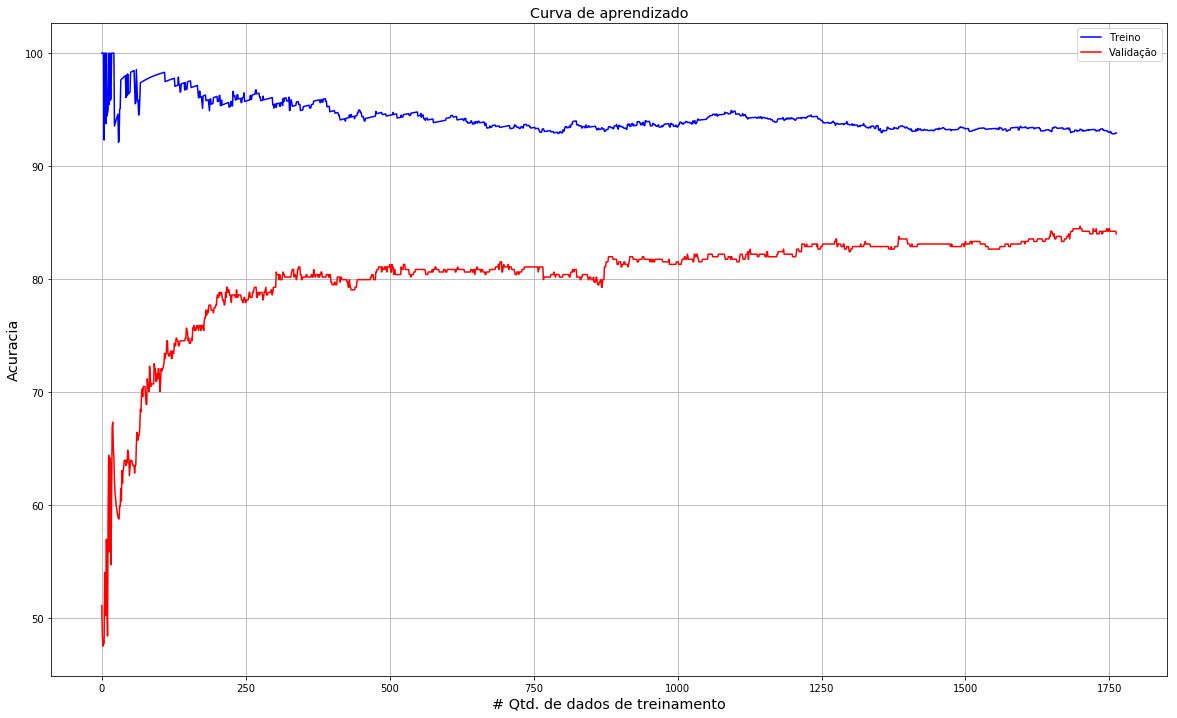

In [19]:
def curva_aprendizado_linear(Xtrain, Ytrain, Xvalid, Yvalid, Cost):
    """
    Funcao usada gerar a curva de aprendizado.
  
    Parametros
    ----------
  
    X : matriz com os dados de treinamento
  
    Y : vetor com as classes dos dados de treinamento
  
    Xval : matriz com os dados de validação
  
    Yval : vetor com as classes dos dados de validação
  
    """

    # inicializa as listas que guardarao a performance no treinamento e na validacao
    perf_train = []
    perf_val = []

    # inicializa o parametro de regularizacao da regressao logistica
    lambda_reg = 1
        
    # Configura o numero de interacaoes da regressao logistica
    iteracoes = 500
        
    # Kernel radial
    kernel = 0
    
    ########################## COMPLETE O CÓDIGO AQUI  ###############################
    #  Instrucoes: Complete o codigo para gerar o gráfico da curva de aprendizado.
    #           Comece o treinamento com as primeiras 10 amostras da base de dados de 
    #           treinamento e calcule a acuracia do classificador tanto nos dados de
    #           treinamento já apresentados, quando na base de validacao. 
    #           Depois disso, adicione mais um dado para treinamento e calcule novamente 
    #           o desempenho. Continue adicionando um dado por vez ate todos os dados de 
    #           treinamento serem usados. Nas listas perf_train e perf_val, guarde a acuracia 
    #           obtida nos dados de treinamento e na base de validacao a cada nova adicao de 
    #           dados para treinamento.
    for idx, i in enumerate(np.arange(9, len(Xtrain) - 1)):
        model = svm_train(Ytrain[:i], Xtrain[:i, :], '-c %f -t %d' %(Cost, kernel))
        
        # Teste
        p_labs, p_acc, p_vals = svm_predict(Ytrain[:i], Xtrain[:i, :], model)
        perf_train.append(p_acc[0])
        
        # Validação
        p_labs, p_acc, p_vals = svm_predict(Yvalid, Xvalid, model)
        perf_val.append(p_acc[0])
    
    ##################################################################################
       
    # Define o tamanho da figura 
    plt.figure(figsize=(20,12))

    # Plota os dados
    plt.plot(perf_train, color='blue', linestyle='-', linewidth=1.5, label='Treino') 
    plt.plot(perf_val, color='red', linestyle='-', linewidth=1.5, label='Validação')

    # Define os nomes do eixo x e do eixo y
    plt.xlabel(r'# Qtd. de dados de treinamento',fontsize='x-large') 
    plt.ylabel(r'Acuracia',fontsize='x-large') 

    # Define o título do gráfico
    plt.title(r'Curva de aprendizado', fontsize='x-large')

    # Acrescenta um grid no gráfico
    plt.grid(axis='both')

    # Plota a legenda
    plt.legend()
    
    plt.show()
    
curva_aprendizado_linear(Xtrain, Ytrain, Xvalid, Yvalid, bestC_linear)

Accuracy = 100% (9/9) (classification)
Accuracy = 47.7477% (212/444) (classification)
Accuracy = 100% (10/10) (classification)
Accuracy = 47.7477% (212/444) (classification)
Accuracy = 100% (11/11) (classification)
Accuracy = 47.7477% (212/444) (classification)
Accuracy = 100% (12/12) (classification)
Accuracy = 47.7477% (212/444) (classification)
Accuracy = 100% (13/13) (classification)
Accuracy = 48.1982% (214/444) (classification)
Accuracy = 100% (14/14) (classification)
Accuracy = 52.7027% (234/444) (classification)
Accuracy = 100% (15/15) (classification)
Accuracy = 54.7297% (243/444) (classification)
Accuracy = 100% (16/16) (classification)
Accuracy = 54.955% (244/444) (classification)
Accuracy = 100% (17/17) (classification)
Accuracy = 54.0541% (240/444) (classification)
Accuracy = 100% (18/18) (classification)
Accuracy = 55.4054% (246/444) (classification)
Accuracy = 100% (19/19) (classification)
Accuracy = 65.7658% (292/444) (classification)
Accuracy = 100% (20/20) (classifica

Accuracy = 55.4054% (246/444) (classification)
Accuracy = 95.0495% (96/101) (classification)
Accuracy = 55.8559% (248/444) (classification)
Accuracy = 95.098% (97/102) (classification)
Accuracy = 55.8559% (248/444) (classification)
Accuracy = 95.1456% (98/103) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 95.1923% (99/104) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 94.2857% (99/105) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 94.3396% (100/106) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 94.3925% (101/107) (classification)
Accuracy = 55.8559% (248/444) (classification)
Accuracy = 94.4444% (102/108) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 94.4954% (103/109) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 94.5455% (104/110) (classification)
Accuracy = 55.6306% (247/444) (classification)
Accuracy = 94.5946%

Accuracy = 57.4324% (255/444) (classification)
Accuracy = 98.9529% (189/191) (classification)
Accuracy = 57.4324% (255/444) (classification)
Accuracy = 98.9583% (190/192) (classification)
Accuracy = 57.6577% (256/444) (classification)
Accuracy = 98.9637% (191/193) (classification)
Accuracy = 57.4324% (255/444) (classification)
Accuracy = 98.9691% (192/194) (classification)
Accuracy = 57.6577% (256/444) (classification)
Accuracy = 98.9744% (193/195) (classification)
Accuracy = 57.6577% (256/444) (classification)
Accuracy = 98.9796% (194/196) (classification)
Accuracy = 57.8829% (257/444) (classification)
Accuracy = 98.9848% (195/197) (classification)
Accuracy = 57.4324% (255/444) (classification)
Accuracy = 98.9899% (196/198) (classification)
Accuracy = 57.8829% (257/444) (classification)
Accuracy = 98.995% (197/199) (classification)
Accuracy = 57.8829% (257/444) (classification)
Accuracy = 99% (198/200) (classification)
Accuracy = 57.8829% (257/444) (classification)
Accuracy = 99.005% 

Accuracy = 60.1351% (267/444) (classification)
Accuracy = 98.5663% (275/279) (classification)
Accuracy = 60.1351% (267/444) (classification)
Accuracy = 98.5714% (276/280) (classification)
Accuracy = 60.1351% (267/444) (classification)
Accuracy = 98.5765% (277/281) (classification)
Accuracy = 60.3604% (268/444) (classification)
Accuracy = 98.5816% (278/282) (classification)
Accuracy = 60.8108% (270/444) (classification)
Accuracy = 98.5866% (279/283) (classification)
Accuracy = 61.036% (271/444) (classification)
Accuracy = 98.5915% (280/284) (classification)
Accuracy = 61.2613% (272/444) (classification)
Accuracy = 98.5965% (281/285) (classification)
Accuracy = 61.2613% (272/444) (classification)
Accuracy = 98.6014% (282/286) (classification)
Accuracy = 61.2613% (272/444) (classification)
Accuracy = 98.6063% (283/287) (classification)
Accuracy = 61.7117% (274/444) (classification)
Accuracy = 98.6111% (284/288) (classification)
Accuracy = 60.8108% (270/444) (classification)
Accuracy = 98.

Accuracy = 98.3696% (362/368) (classification)
Accuracy = 61.9369% (275/444) (classification)
Accuracy = 98.374% (363/369) (classification)
Accuracy = 61.9369% (275/444) (classification)
Accuracy = 98.3784% (364/370) (classification)
Accuracy = 61.9369% (275/444) (classification)
Accuracy = 98.3827% (365/371) (classification)
Accuracy = 61.9369% (275/444) (classification)
Accuracy = 98.3871% (366/372) (classification)
Accuracy = 61.9369% (275/444) (classification)
Accuracy = 98.3914% (367/373) (classification)
Accuracy = 61.9369% (275/444) (classification)
Accuracy = 98.3957% (368/374) (classification)
Accuracy = 61.9369% (275/444) (classification)
Accuracy = 98.4% (369/375) (classification)
Accuracy = 61.9369% (275/444) (classification)
Accuracy = 98.4043% (370/376) (classification)
Accuracy = 61.9369% (275/444) (classification)
Accuracy = 98.4085% (371/377) (classification)
Accuracy = 61.9369% (275/444) (classification)
Accuracy = 98.4127% (372/378) (classification)
Accuracy = 61.936

Accuracy = 61.9369% (275/444) (classification)
Accuracy = 97.807% (446/456) (classification)
Accuracy = 61.9369% (275/444) (classification)
Accuracy = 97.593% (446/457) (classification)
Accuracy = 61.7117% (274/444) (classification)
Accuracy = 97.5983% (447/458) (classification)
Accuracy = 61.9369% (275/444) (classification)
Accuracy = 97.6035% (448/459) (classification)
Accuracy = 61.9369% (275/444) (classification)
Accuracy = 97.6087% (449/460) (classification)
Accuracy = 61.9369% (275/444) (classification)
Accuracy = 97.6139% (450/461) (classification)
Accuracy = 61.9369% (275/444) (classification)
Accuracy = 97.619% (451/462) (classification)
Accuracy = 61.9369% (275/444) (classification)
Accuracy = 97.6242% (452/463) (classification)
Accuracy = 61.9369% (275/444) (classification)
Accuracy = 97.6293% (453/464) (classification)
Accuracy = 61.9369% (275/444) (classification)
Accuracy = 97.8495% (455/465) (classification)
Accuracy = 61.9369% (275/444) (classification)
Accuracy = 97.63

Accuracy = 98.1618% (534/544) (classification)
Accuracy = 64.6396% (287/444) (classification)
Accuracy = 98.1651% (535/545) (classification)
Accuracy = 64.6396% (287/444) (classification)
Accuracy = 98.1685% (536/546) (classification)
Accuracy = 64.6396% (287/444) (classification)
Accuracy = 98.1718% (537/547) (classification)
Accuracy = 64.6396% (287/444) (classification)
Accuracy = 98.1752% (538/548) (classification)
Accuracy = 64.6396% (287/444) (classification)
Accuracy = 98.3607% (540/549) (classification)
Accuracy = 65.0901% (289/444) (classification)
Accuracy = 98.1818% (540/550) (classification)
Accuracy = 64.8649% (288/444) (classification)
Accuracy = 98.1851% (541/551) (classification)
Accuracy = 64.8649% (288/444) (classification)
Accuracy = 98.1884% (542/552) (classification)
Accuracy = 64.8649% (288/444) (classification)
Accuracy = 98.1917% (543/553) (classification)
Accuracy = 64.8649% (288/444) (classification)
Accuracy = 98.1949% (544/554) (classification)
Accuracy = 64

Accuracy = 66.4414% (295/444) (classification)
Accuracy = 98.7362% (625/633) (classification)
Accuracy = 66.4414% (295/444) (classification)
Accuracy = 98.7382% (626/634) (classification)
Accuracy = 65.991% (293/444) (classification)
Accuracy = 98.7402% (627/635) (classification)
Accuracy = 65.991% (293/444) (classification)
Accuracy = 98.7421% (628/636) (classification)
Accuracy = 65.991% (293/444) (classification)
Accuracy = 98.7441% (629/637) (classification)
Accuracy = 65.991% (293/444) (classification)
Accuracy = 98.7461% (630/638) (classification)
Accuracy = 65.991% (293/444) (classification)
Accuracy = 98.748% (631/639) (classification)
Accuracy = 66.4414% (295/444) (classification)
Accuracy = 98.75% (632/640) (classification)
Accuracy = 66.4414% (295/444) (classification)
Accuracy = 98.752% (633/641) (classification)
Accuracy = 66.6667% (296/444) (classification)
Accuracy = 98.7539% (634/642) (classification)
Accuracy = 67.1171% (298/444) (classification)
Accuracy = 98.7558% (6

Accuracy = 98.613% (711/721) (classification)
Accuracy = 66.4414% (295/444) (classification)
Accuracy = 98.615% (712/722) (classification)
Accuracy = 66.4414% (295/444) (classification)
Accuracy = 98.6169% (713/723) (classification)
Accuracy = 66.4414% (295/444) (classification)
Accuracy = 98.6188% (714/724) (classification)
Accuracy = 66.4414% (295/444) (classification)
Accuracy = 98.6207% (715/725) (classification)
Accuracy = 66.4414% (295/444) (classification)
Accuracy = 98.6226% (716/726) (classification)
Accuracy = 66.6667% (296/444) (classification)
Accuracy = 98.6245% (717/727) (classification)
Accuracy = 66.4414% (295/444) (classification)
Accuracy = 98.6264% (718/728) (classification)
Accuracy = 66.8919% (297/444) (classification)
Accuracy = 98.6283% (719/729) (classification)
Accuracy = 67.1171% (298/444) (classification)
Accuracy = 98.6301% (720/730) (classification)
Accuracy = 67.1171% (298/444) (classification)
Accuracy = 98.632% (721/731) (classification)
Accuracy = 67.11

Accuracy = 98.3931% (796/809) (classification)
Accuracy = 65.991% (293/444) (classification)
Accuracy = 98.3951% (797/810) (classification)
Accuracy = 65.991% (293/444) (classification)
Accuracy = 98.397% (798/811) (classification)
Accuracy = 65.991% (293/444) (classification)
Accuracy = 98.399% (799/812) (classification)
Accuracy = 65.991% (293/444) (classification)
Accuracy = 98.401% (800/813) (classification)
Accuracy = 65.991% (293/444) (classification)
Accuracy = 98.4029% (801/814) (classification)
Accuracy = 65.991% (293/444) (classification)
Accuracy = 98.4049% (802/815) (classification)
Accuracy = 65.7658% (292/444) (classification)
Accuracy = 98.4069% (803/816) (classification)
Accuracy = 65.7658% (292/444) (classification)
Accuracy = 98.4088% (804/817) (classification)
Accuracy = 65.7658% (292/444) (classification)
Accuracy = 98.4108% (805/818) (classification)
Accuracy = 65.7658% (292/444) (classification)
Accuracy = 98.4127% (806/819) (classification)
Accuracy = 65.7658% (2

Accuracy = 98.3278% (882/897) (classification)
Accuracy = 69.1441% (307/444) (classification)
Accuracy = 98.3296% (883/898) (classification)
Accuracy = 69.1441% (307/444) (classification)
Accuracy = 98.3315% (884/899) (classification)
Accuracy = 69.1441% (307/444) (classification)
Accuracy = 98.3333% (885/900) (classification)
Accuracy = 69.1441% (307/444) (classification)
Accuracy = 98.3352% (886/901) (classification)
Accuracy = 69.1441% (307/444) (classification)
Accuracy = 98.337% (887/902) (classification)
Accuracy = 69.1441% (307/444) (classification)
Accuracy = 98.3389% (888/903) (classification)
Accuracy = 69.1441% (307/444) (classification)
Accuracy = 98.3407% (889/904) (classification)
Accuracy = 69.1441% (307/444) (classification)
Accuracy = 98.3425% (890/905) (classification)
Accuracy = 69.1441% (307/444) (classification)
Accuracy = 98.3444% (891/906) (classification)
Accuracy = 69.1441% (307/444) (classification)
Accuracy = 98.3462% (892/907) (classification)
Accuracy = 69.

Accuracy = 98.3756% (969/985) (classification)
Accuracy = 70.045% (311/444) (classification)
Accuracy = 98.2759% (969/986) (classification)
Accuracy = 69.8198% (310/444) (classification)
Accuracy = 98.2776% (970/987) (classification)
Accuracy = 69.8198% (310/444) (classification)
Accuracy = 98.2794% (971/988) (classification)
Accuracy = 69.8198% (310/444) (classification)
Accuracy = 98.2811% (972/989) (classification)
Accuracy = 69.8198% (310/444) (classification)
Accuracy = 98.2828% (973/990) (classification)
Accuracy = 70.045% (311/444) (classification)
Accuracy = 98.2846% (974/991) (classification)
Accuracy = 70.045% (311/444) (classification)
Accuracy = 98.2863% (975/992) (classification)
Accuracy = 69.8198% (310/444) (classification)
Accuracy = 98.288% (976/993) (classification)
Accuracy = 69.8198% (310/444) (classification)
Accuracy = 98.2897% (977/994) (classification)
Accuracy = 69.8198% (310/444) (classification)
Accuracy = 98.191% (977/995) (classification)
Accuracy = 70.2703

Accuracy = 98.3209% (1054/1072) (classification)
Accuracy = 72.7477% (323/444) (classification)
Accuracy = 98.3225% (1055/1073) (classification)
Accuracy = 72.973% (324/444) (classification)
Accuracy = 98.324% (1056/1074) (classification)
Accuracy = 72.7477% (323/444) (classification)
Accuracy = 98.3256% (1057/1075) (classification)
Accuracy = 72.7477% (323/444) (classification)
Accuracy = 98.3271% (1058/1076) (classification)
Accuracy = 72.7477% (323/444) (classification)
Accuracy = 98.3287% (1059/1077) (classification)
Accuracy = 72.7477% (323/444) (classification)
Accuracy = 98.3302% (1060/1078) (classification)
Accuracy = 72.7477% (323/444) (classification)
Accuracy = 98.3318% (1061/1079) (classification)
Accuracy = 72.7477% (323/444) (classification)
Accuracy = 98.3333% (1062/1080) (classification)
Accuracy = 72.973% (324/444) (classification)
Accuracy = 98.3349% (1063/1081) (classification)
Accuracy = 72.973% (324/444) (classification)
Accuracy = 98.3364% (1064/1082) (classificat

Accuracy = 98.1865% (1137/1158) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 98.1881% (1138/1159) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 98.1897% (1139/1160) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 98.1912% (1140/1161) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 98.1928% (1141/1162) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 98.1083% (1141/1163) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 98.11% (1142/1164) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 98.1116% (1143/1165) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 98.1132% (1144/1166) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 98.1148% (1145/1167) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 98.1164% (1146/1168) (classific

Accuracy = 98.4739% (1226/1245) (classification)
Accuracy = 75.4505% (335/444) (classification)
Accuracy = 98.3949% (1226/1246) (classification)
Accuracy = 75.4505% (335/444) (classification)
Accuracy = 98.4763% (1228/1247) (classification)
Accuracy = 75.4505% (335/444) (classification)
Accuracy = 98.4776% (1229/1248) (classification)
Accuracy = 75.4505% (335/444) (classification)
Accuracy = 98.3987% (1229/1249) (classification)
Accuracy = 75.4505% (335/444) (classification)
Accuracy = 98.4% (1230/1250) (classification)
Accuracy = 75.4505% (335/444) (classification)
Accuracy = 98.4013% (1231/1251) (classification)
Accuracy = 75.4505% (335/444) (classification)
Accuracy = 98.4824% (1233/1252) (classification)
Accuracy = 75.4505% (335/444) (classification)
Accuracy = 98.4836% (1234/1253) (classification)
Accuracy = 75.4505% (335/444) (classification)
Accuracy = 98.4848% (1235/1254) (classification)
Accuracy = 75.4505% (335/444) (classification)
Accuracy = 98.4861% (1236/1255) (classifica

Accuracy = 98.3496% (1311/1333) (classification)
Accuracy = 75.4505% (335/444) (classification)
Accuracy = 98.3508% (1312/1334) (classification)
Accuracy = 75.4505% (335/444) (classification)
Accuracy = 98.3521% (1313/1335) (classification)
Accuracy = 75.9009% (337/444) (classification)
Accuracy = 98.3533% (1314/1336) (classification)
Accuracy = 75.9009% (337/444) (classification)
Accuracy = 98.3545% (1315/1337) (classification)
Accuracy = 75.9009% (337/444) (classification)
Accuracy = 98.3558% (1316/1338) (classification)
Accuracy = 75.9009% (337/444) (classification)
Accuracy = 98.357% (1317/1339) (classification)
Accuracy = 75.9009% (337/444) (classification)
Accuracy = 98.3582% (1318/1340) (classification)
Accuracy = 75.9009% (337/444) (classification)
Accuracy = 98.3594% (1319/1341) (classification)
Accuracy = 75.9009% (337/444) (classification)
Accuracy = 98.3607% (1320/1342) (classification)
Accuracy = 75.9009% (337/444) (classification)
Accuracy = 98.3619% (1321/1343) (classifi

Accuracy = 98.4496% (1397/1419) (classification)
Accuracy = 76.5766% (340/444) (classification)
Accuracy = 98.3803% (1397/1420) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 98.3814% (1398/1421) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 98.3826% (1399/1422) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 98.3837% (1400/1423) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 98.3848% (1401/1424) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 98.386% (1402/1425) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 98.3871% (1403/1426) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 98.3882% (1404/1427) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 98.3894% (1405/1428) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 98.3905% (1406/1429) (classifi

Accuracy = 98.3389% (1480/1505) (classification)
Accuracy = 77.9279% (346/444) (classification)
Accuracy = 98.4728% (1483/1506) (classification)
Accuracy = 77.9279% (346/444) (classification)
Accuracy = 98.4074% (1483/1507) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 98.4748% (1485/1508) (classification)
Accuracy = 77.9279% (346/444) (classification)
Accuracy = 98.4758% (1486/1509) (classification)
Accuracy = 77.9279% (346/444) (classification)
Accuracy = 98.4768% (1487/1510) (classification)
Accuracy = 77.9279% (346/444) (classification)
Accuracy = 98.4778% (1488/1511) (classification)
Accuracy = 78.3784% (348/444) (classification)
Accuracy = 98.4788% (1489/1512) (classification)
Accuracy = 77.9279% (346/444) (classification)
Accuracy = 98.4798% (1490/1513) (classification)
Accuracy = 77.9279% (346/444) (classification)
Accuracy = 98.4808% (1491/1514) (classification)
Accuracy = 77.9279% (346/444) (classification)
Accuracy = 98.4818% (1492/1515) (classif

Accuracy = 97.9887% (1559/1591) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 97.9899% (1560/1592) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 97.9912% (1561/1593) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 97.9925% (1562/1594) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 97.9937% (1563/1595) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 97.995% (1564/1596) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 97.9962% (1565/1597) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 97.9975% (1566/1598) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 97.9987% (1567/1599) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 98% (1568/1600) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 98.0012% (1569/1601) (classificatio

Accuracy = 98.0918% (1645/1677) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 98.093% (1646/1678) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 98.1537% (1648/1679) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 98.1548% (1649/1680) (classification)
Accuracy = 77.7027% (345/444) (classification)
Accuracy = 98.0964% (1649/1681) (classification)
Accuracy = 77.027% (342/444) (classification)
Accuracy = 98.0975% (1650/1682) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 98.0986% (1651/1683) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 98.0998% (1652/1684) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 98.1009% (1653/1685) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 98.1613% (1655/1686) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 98.1624% (1656/1687) (classific

Accuracy = 98.2416% (1732/1763) (classification)
Accuracy = 78.1532% (347/444) (classification)
Accuracy = 98.2426% (1733/1764) (classification)
Accuracy = 78.1532% (347/444) (classification)
Accuracy = 98.3003% (1735/1765) (classification)
Accuracy = 78.1532% (347/444) (classification)
Accuracy = 98.3012% (1736/1766) (classification)
Accuracy = 78.1532% (347/444) (classification)
Accuracy = 98.3588% (1738/1767) (classification)
Accuracy = 78.3784% (348/444) (classification)
Accuracy = 98.4163% (1740/1768) (classification)
Accuracy = 78.6036% (349/444) (classification)
Accuracy = 98.4172% (1741/1769) (classification)
Accuracy = 78.6036% (349/444) (classification)
Accuracy = 98.4181% (1742/1770) (classification)
Accuracy = 78.6036% (349/444) (classification)
Accuracy = 98.419% (1743/1771) (classification)
Accuracy = 78.6036% (349/444) (classification)


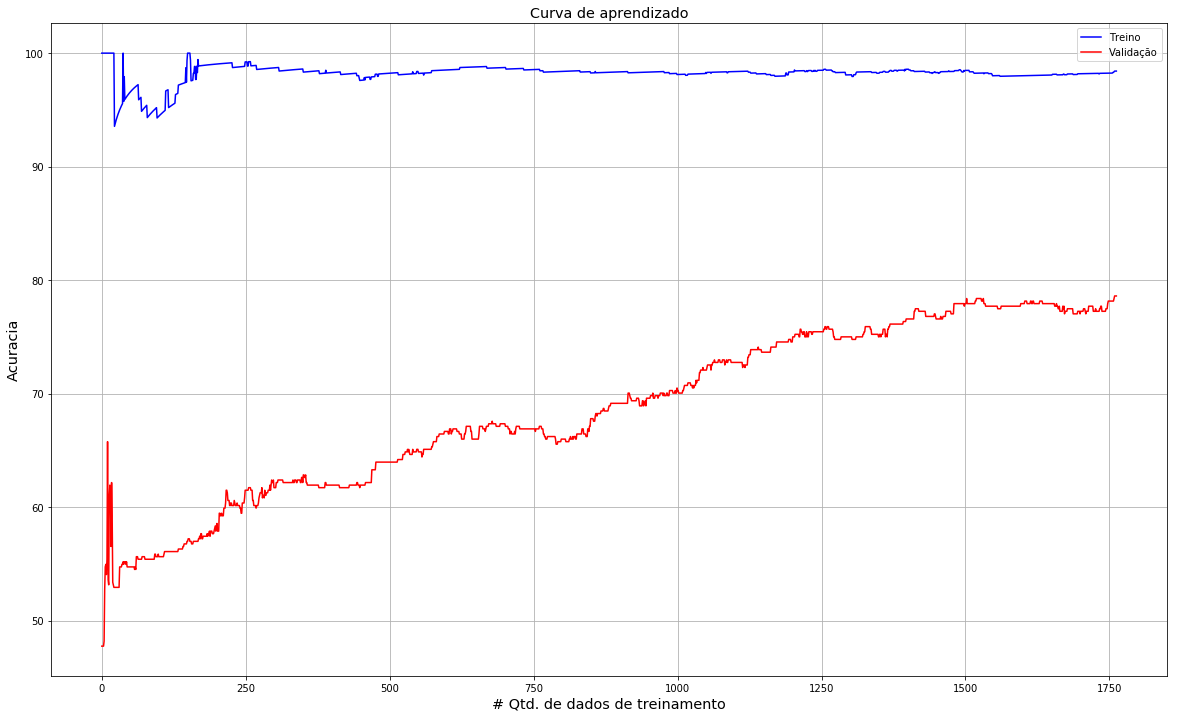

In [20]:
def curva_aprendizado(Xtrain, Ytrain, Xvalid, Yvalid, Cost, Gamma, kernel):
    """
    Funcao usada gerar a curva de aprendizado.
  
    Parametros
    ----------
  
    X : matriz com os dados de treinamento
  
    Y : vetor com as classes dos dados de treinamento
  
    Xval : matriz com os dados de validação
  
    Yval : vetor com as classes dos dados de validação
  
    """

    # inicializa as listas que guardarao a performance no treinamento e na validacao
    perf_train = []
    perf_val = []

    # inicializa o parametro de regularizacao da regressao logistica
    lambda_reg = 1
        
    # Configura o numero de interacaoes da regressao logistica
    iteracoes = 500
    
    ########################## COMPLETE O CÓDIGO AQUI  ###############################
    #  Instrucoes: Complete o codigo para gerar o gráfico da curva de aprendizado.
    #           Comece o treinamento com as primeiras 10 amostras da base de dados de 
    #           treinamento e calcule a acuracia do classificador tanto nos dados de
    #           treinamento já apresentados, quando na base de validacao. 
    #           Depois disso, adicione mais um dado para treinamento e calcule novamente 
    #           o desempenho. Continue adicionando um dado por vez ate todos os dados de 
    #           treinamento serem usados. Nas listas perf_train e perf_val, guarde a acuracia 
    #           obtida nos dados de treinamento e na base de validacao a cada nova adicao de 
    #           dados para treinamento.
    for idx, i in enumerate(np.arange(9, len(Xtrain) - 1)):
        model = svm_train(Ytrain[:i], Xtrain[:i, :], '-q -c %f -t %d -g %f' %(Cost, kernel, Gamma))
        
        # Teste
        p_labs, p_acc, p_vals = svm_predict(Ytrain[:i], Xtrain[:i, :], model)
        perf_train.append(p_acc[0])
        
        # Validação
        p_labs, p_acc, p_vals = svm_predict(Yvalid, Xvalid, model)
        perf_val.append(p_acc[0])
    
    ##################################################################################
       
    # Define o tamanho da figura 
    plt.figure(figsize=(20,12))

    # Plota os dados
    plt.plot(perf_train, color='blue', linestyle='-', linewidth=1.5, label='Treino') 
    plt.plot(perf_val, color='red', linestyle='-', linewidth=1.5, label='Validação')

    # Define os nomes do eixo x e do eixo y
    plt.xlabel(r'# Qtd. de dados de treinamento',fontsize='x-large') 
    plt.ylabel(r'Acuracia',fontsize='x-large') 

    # Define o título do gráfico
    plt.title(r'Curva de aprendizado', fontsize='x-large')

    # Acrescenta um grid no gráfico
    plt.grid(axis='both')

    # Plota a legenda
    plt.legend()
    
    plt.show()
    
curva_aprendizado(Xtrain, Ytrain, Xvalid, Yvalid, bestC_polinomial, bestGamma_polinomial, 1)

Accuracy = 100% (9/9) (classification)
Accuracy = 54.2793% (241/444) (classification)
Accuracy = 100% (10/10) (classification)
Accuracy = 52.7027% (234/444) (classification)
Accuracy = 100% (11/11) (classification)
Accuracy = 47.7477% (212/444) (classification)
Accuracy = 100% (12/12) (classification)
Accuracy = 48.1982% (214/444) (classification)
Accuracy = 100% (13/13) (classification)
Accuracy = 50.4505% (224/444) (classification)
Accuracy = 100% (14/14) (classification)
Accuracy = 54.2793% (241/444) (classification)
Accuracy = 100% (15/15) (classification)
Accuracy = 54.2793% (241/444) (classification)
Accuracy = 100% (16/16) (classification)
Accuracy = 53.6036% (238/444) (classification)
Accuracy = 100% (17/17) (classification)
Accuracy = 62.6126% (278/444) (classification)
Accuracy = 100% (18/18) (classification)
Accuracy = 56.3063% (250/444) (classification)
Accuracy = 100% (19/19) (classification)
Accuracy = 54.955% (244/444) (classification)
Accuracy = 100% (20/20) (classifica

Accuracy = 73.4234% (326/444) (classification)
Accuracy = 99.0741% (107/108) (classification)
Accuracy = 73.4234% (326/444) (classification)
Accuracy = 99.0826% (108/109) (classification)
Accuracy = 72.5225% (322/444) (classification)
Accuracy = 99.0909% (109/110) (classification)
Accuracy = 72.973% (324/444) (classification)
Accuracy = 99.0991% (110/111) (classification)
Accuracy = 72.973% (324/444) (classification)
Accuracy = 99.1071% (111/112) (classification)
Accuracy = 73.4234% (326/444) (classification)
Accuracy = 99.115% (112/113) (classification)
Accuracy = 73.6486% (327/444) (classification)
Accuracy = 99.1228% (113/114) (classification)
Accuracy = 72.5225% (322/444) (classification)
Accuracy = 99.1304% (114/115) (classification)
Accuracy = 72.7477% (323/444) (classification)
Accuracy = 99.1379% (115/116) (classification)
Accuracy = 71.8468% (319/444) (classification)
Accuracy = 99.1453% (116/117) (classification)
Accuracy = 71.8468% (319/444) (classification)
Accuracy = 99.15

Accuracy = 98.4925% (196/199) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 98.5% (197/200) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 98.5075% (198/201) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 98.5149% (199/202) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 98.5222% (200/203) (classification)
Accuracy = 77.027% (342/444) (classification)
Accuracy = 98.5294% (201/204) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 98.5366% (202/205) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 98.5437% (203/206) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 98.5507% (204/207) (classification)
Accuracy = 77.2523% (343/444) (classification)
Accuracy = 98.5577% (205/208) (classification)
Accuracy = 77.4775% (344/444) (classification)
Accuracy = 98.0861% (205/209) (classification)
Accuracy = 77.702

Accuracy = 97.9167% (282/288) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 97.9239% (283/289) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 97.931% (284/290) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 97.9381% (285/291) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 97.9452% (286/292) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 97.9522% (287/293) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.9592% (288/294) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.9661% (289/295) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 97.973% (290/296) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 97.9798% (291/297) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 97.9866% (292/298) (classification)
Accuracy = 80.855

Accuracy = 80.8559% (359/444) (classification)
Accuracy = 98.4127% (372/378) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 98.4169% (373/379) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 98.4211% (374/380) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 98.4252% (375/381) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 98.4293% (376/382) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 98.4334% (377/383) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 98.4375% (378/384) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 98.4416% (379/385) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 98.4456% (380/386) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 98.4496% (381/387) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 98

Accuracy = 97.8495% (455/465) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 97.8541% (456/466) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 97.8587% (457/467) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.8632% (458/468) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.8678% (459/469) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.8723% (460/470) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.8769% (461/471) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.8814% (462/472) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.8858% (463/473) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.8903% (464/474) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.8947% (465/475) (classification)
Accuracy = 81

Accuracy = 97.6492% (540/553) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 97.4729% (540/554) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 97.4775% (541/555) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.482% (542/556) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.4865% (543/557) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.491% (544/558) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.4955% (545/559) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.5% (546/560) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.5045% (547/561) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.5089% (548/562) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.3357% (548/563) (classification)
Accuracy = 81.0811

Accuracy = 96.8799% (621/641) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.8847% (622/642) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.8896% (623/643) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 97.3602% (627/644) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 97.3643% (628/645) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 97.3684% (629/646) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 97.3725% (630/647) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 97.3765% (631/648) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 97.3806% (632/649) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 97.3846% (633/650) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 97.3886% (634/651) (classification)
Accuracy = 80.40

Accuracy = 97.1193% (708/729) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 96.9863% (708/730) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.9904% (709/731) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.9945% (710/732) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.9986% (711/733) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 97.0027% (712/734) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 97.0068% (713/735) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 97.0109% (714/736) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 97.0149% (715/737) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 97.019% (716/738) (classification)
Accuracy = 80.1802% (356/444) (classification)
Accuracy = 97.023% (717/739) (classification)
Accuracy = 80.1802% (

Accuracy = 96.4504% (788/817) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.4548% (789/818) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.4591% (790/819) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.4634% (791/820) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.5895% (793/821) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.5937% (794/822) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.5978% (795/823) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.6019% (796/824) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.6061% (797/825) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 96.6102% (798/826) (classification)
Accuracy = 80.4054% (357/444) (classification)
Accuracy = 96.6143% (799/827) (classification)
Accuracy = 80.4054% (

Accuracy = 97.0166% (878/905) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 96.9095% (878/906) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.0232% (880/907) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 97.0264% (881/908) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 96.9197% (881/909) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 96.9231% (882/910) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 96.9265% (883/911) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 96.9298% (884/912) (classification)
Accuracy = 80.6306% (358/444) (classification)
Accuracy = 96.9332% (885/913) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.9365% (886/914) (classification)
Accuracy = 79.955% (355/444) (classification)
Accuracy = 96.9399% (887/915) (classification)
Accuracy = 79.9

Accuracy = 96.9789% (963/993) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 96.9819% (964/994) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 96.9849% (965/995) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 96.988% (966/996) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 96.991% (967/997) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 96.994% (968/998) (classification)
Accuracy = 81.0811% (360/444) (classification)
Accuracy = 96.997% (969/999) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 97% (970/1000) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 97.003% (971/1001) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 97.006% (972/1002) (classification)
Accuracy = 80.8559% (359/444) (classification)
Accuracy = 97.009% (973/1003) (classification)
Accuracy = 80.8559% (

Accuracy = 96.8519% (1046/1080) (classification)
Accuracy = 81.7568% (363/444) (classification)
Accuracy = 96.8548% (1047/1081) (classification)
Accuracy = 81.7568% (363/444) (classification)
Accuracy = 96.9501% (1049/1082) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 96.9529% (1050/1083) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 96.9557% (1051/1084) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 96.9585% (1052/1085) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 96.9613% (1053/1086) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 96.9641% (1054/1087) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 96.9669% (1055/1088) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 96.9697% (1056/1089) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 96.9725% (1057/1090) (classif

Accuracy = 97.2556% (1134/1166) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.2579% (1135/1167) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.2603% (1136/1168) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.2626% (1137/1169) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.265% (1138/1170) (classification)
Accuracy = 81.3063% (361/444) (classification)
Accuracy = 97.1819% (1138/1171) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 97.1843% (1139/1172) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 97.1867% (1140/1173) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 97.1891% (1141/1174) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 97.1915% (1142/1175) (classification)
Accuracy = 81.5315% (362/444) (classification)
Accuracy = 97.1939% (1143/1176) (classifi

Accuracy = 97.0447% (1215/1252) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.0471% (1216/1253) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.0494% (1217/1254) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.0518% (1218/1255) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.0541% (1219/1256) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.136% (1221/1257) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.0588% (1221/1258) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.0612% (1222/1259) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.1429% (1224/1260) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.1451% (1225/1261) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.0681% (1225/1262) (classifi

Accuracy = 97.0852% (1299/1338) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 97.0874% (1300/1339) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.1642% (1302/1340) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.0917% (1302/1341) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.0939% (1303/1342) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.1705% (1305/1343) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.1726% (1306/1344) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.1747% (1307/1345) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.1768% (1308/1346) (classification)
Accuracy = 82.4324% (366/444) (classification)
Accuracy = 97.1789% (1309/1347) (classification)
Accuracy = 82.6577% (367/444) (classification)
Accuracy = 97.181% (1310/1348) (classifi

Accuracy = 97.1208% (1383/1424) (classification)
Accuracy = 83.3333% (370/444) (classification)
Accuracy = 97.1228% (1384/1425) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 97.0547% (1384/1426) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 96.9867% (1384/1427) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 96.9888% (1385/1428) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 96.9909% (1386/1429) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 96.993% (1387/1430) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 96.9951% (1388/1431) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 96.9274% (1388/1432) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 96.9295% (1389/1433) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 96.9317% (1390/1434) (classifi

Accuracy = 96.8212% (1462/1510) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 96.8233% (1463/1511) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 96.8254% (1464/1512) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 96.8275% (1465/1513) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 96.8296% (1466/1514) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 96.8317% (1467/1515) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 96.7678% (1467/1516) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 96.7699% (1468/1517) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 96.7721% (1469/1518) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 96.7742% (1470/1519) (classification)
Accuracy = 82.8829% (368/444) (classification)
Accuracy = 96.7763% (1471/1520) (classif

Accuracy = 97.0551% (1549/1596) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 97.057% (1550/1597) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 97.0588% (1551/1598) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 97.0607% (1552/1599) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 97.0625% (1553/1600) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 97.0019% (1553/1601) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 97.0037% (1554/1602) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 97.0056% (1555/1603) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 97.0075% (1556/1604) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 97.0093% (1557/1605) (classification)
Accuracy = 83.1081% (369/444) (classification)
Accuracy = 97.0112% (1558/1606) (classifi

Accuracy = 96.9679% (1631/1682) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 96.9697% (1632/1683) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 96.9715% (1633/1684) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 96.9139% (1633/1685) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 96.9751% (1635/1686) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 96.9769% (1636/1687) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 96.9787% (1637/1688) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 96.9213% (1637/1689) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 96.9822% (1639/1690) (classification)
Accuracy = 83.7838% (372/444) (classification)
Accuracy = 96.9249% (1639/1691) (classification)
Accuracy = 83.5586% (371/444) (classification)
Accuracy = 96.9858% (1641/1692) (classif

Accuracy = 96.8891% (1713/1768) (classification)
Accuracy = 84.9099% (377/444) (classification)
Accuracy = 96.8909% (1714/1769) (classification)
Accuracy = 84.9099% (377/444) (classification)
Accuracy = 96.8927% (1715/1770) (classification)
Accuracy = 84.9099% (377/444) (classification)
Accuracy = 96.8379% (1715/1771) (classification)
Accuracy = 85.1351% (378/444) (classification)


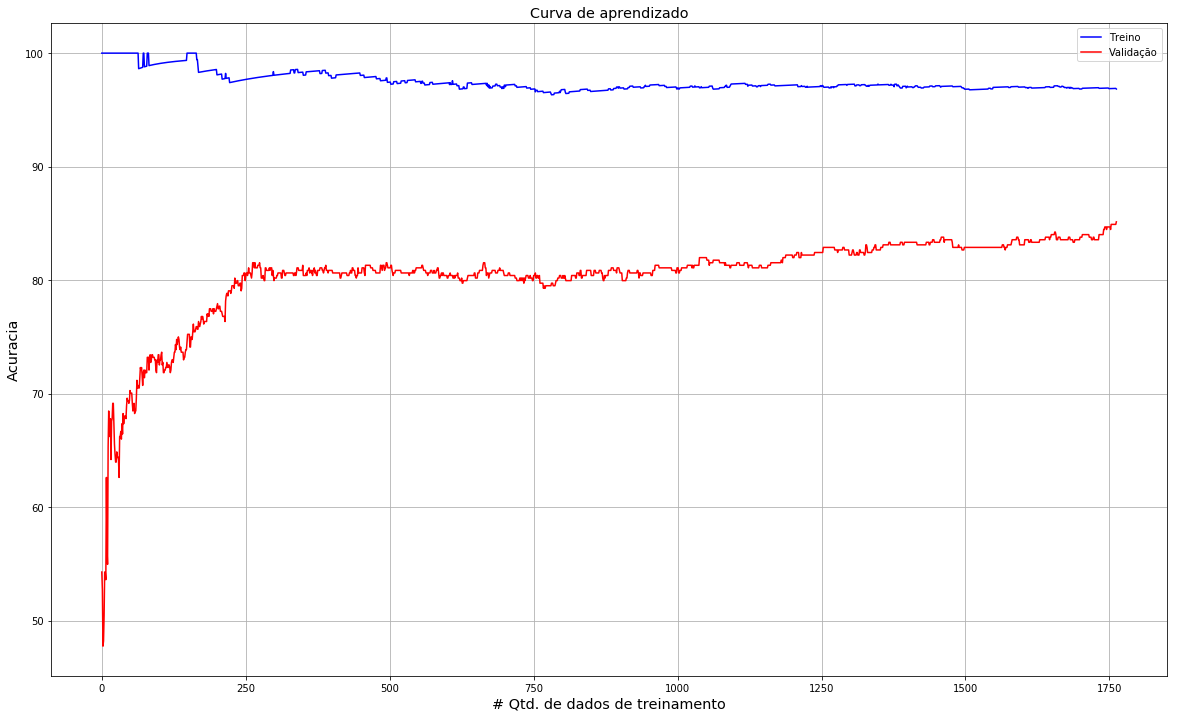

In [21]:
curva_aprendizado(Xtrain, Ytrain, Xvalid, Yvalid, bestC_radial, bestGamma_radial, 2)